# Data Description

In [1]:
from __future__ import division, print_function
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from astropy.io import ascii
from utils import *
import math
from sklearn.model_selection import train_test_split
random_state = 1
from scipy.stats import skew, kurtosis, describe
%matplotlib inline

In [32]:
datasets = "../datasets/SuperCOSMOS/"
img_dir = "../img/"
img_dir_db = "/home/phil/Dropbox/Apps/Overleaf/DME SSS Project Final/img/"
tables_dir_db = "/home/phil/Dropbox/Apps/Overleaf/DME SSS Project Final/tables/"

uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
uki823_df.columns = col_names

uki823_rel_df = uki823_df.iloc[:, relevant_indices]

X_raw = uki823_df
yy = uki823_df['CLASS_SDSS']

# 70, 20, 10
X_temp, X_raw_test, yy_temp, yy_test = train_test_split(X_raw, yy, test_size=0.1, random_state=random_state)
#22% of 90% = 20%
X_raw_train, X_raw_val, yy_train, yy_val = train_test_split(X_temp, yy_temp, test_size=0.22, random_state=random_state)

uki823_rel_df = X_raw_train.iloc[:, relevant_indices]

In [3]:
# uki823_rel_df.describe().loc[:, ["AREA", "IPEAK"]].round(3).to_latex(buf=tables_dir_db+"scaling-vars.tex")

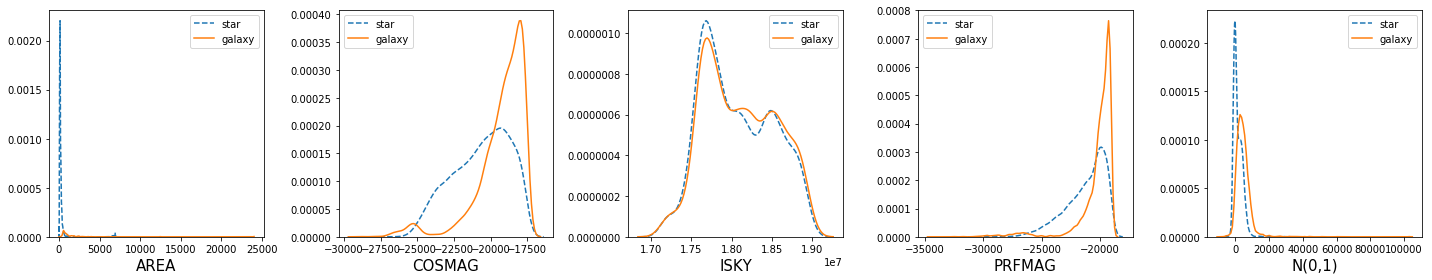

In [4]:
width = 2
non_useful_cols = ["BLEND", "QUALITY", "CLASS_SDSS", "RMAG_SDSS", "GMAG_SDSS", "IMAG_SDSS", "RA_SDSS", "DEC_SDSS"]
# fig, ax = plt.subplots(width, math.floor((uki823_rel_df.shape[1]-len(non_useful_cols))/width), figsize=(18,5))

# to_iter = uki823_rel_df.drop(non_useful_cols, axis=1)
to_iter = uki823_rel_df.loc[:, ["AREA", "COSMAG", "ISKY", "PRFMAG", "N(0,1)"]]

fig, ax = plt.subplots(1, to_iter.shape[1], figsize=(20,4))

for ii, col in enumerate(to_iter):
#     a = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 6], ax=ax[ii % width][math.floor(ii / width)], label="star", hist=False, kde_kws={"linestyle": "--"})
    a = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 6], ax=ax[ii], label="star", hist=False, kde_kws={"linestyle": "--"})
    a.set_xlabel(col, fontsize=15)
#     b = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 3], ax=ax[ii % width][math.floor(ii / width)], label="galaxy", hist=False)
    b = sns.distplot(uki823_rel_df.drop(non_useful_cols, axis=1)[col][uki823_rel_df.CLASS_SDSS == 3], ax=ax[ii], label="galaxy", hist=False)
    
# fig.legend(("star", "galaxy"))
fig.tight_layout()
fig.savefig(img_dir_db + 'var-dist-by-class.pdf', format='pdf', dpi=1200)

In [5]:
uki823_rel_df_star = uki823_rel_df[uki823_rel_df.CLASS_SDSS == 6]
uki823_rel_df_gala = uki823_rel_df[uki823_rel_df.CLASS_SDSS == 3]

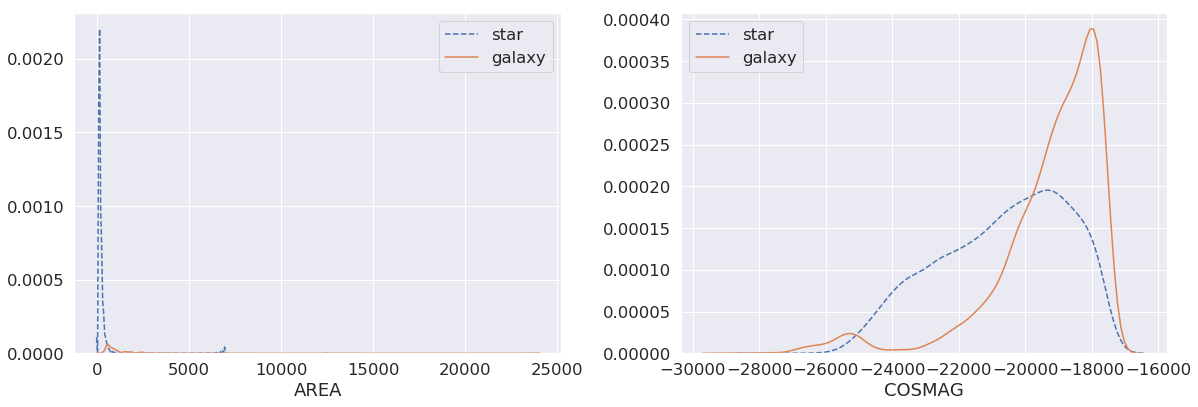

In [53]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 2, figsize=(17,6))

sns.distplot(uki823_rel_df_star["AREA"], ax=ax[0], label="star", hist=False, kde_kws={"linestyle": "--"})
sns.distplot(uki823_rel_df_gala["AREA"], ax=ax[0], label="galaxy", hist=False)

sns.distplot(uki823_rel_df_star["COSMAG"], ax=ax[1], label="star", hist=False, kde_kws={"linestyle": "--"})
sns.distplot(uki823_rel_df_gala["COSMAG"], ax=ax[1], label="galaxy", hist=False)

fig.tight_layout()
fig.savefig(img_dir_db + 'area-cosmag-plots.pdf', format='pdf', dpi=1200)
sns.set()

In [7]:
uki823_rel_df_gala.describe().drop(non_useful_cols, axis=1)

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG
count,4077.000000,4.077000e+03,4077.000000,4.077000e+03,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000,4077.000000
mean,88.610743,6.195036e+06,-19289.685063,1.810300e+07,5035.509198,3467.149375,87.046848,4349.729458,2934.201864,86.192298,4539.498896,-20204.496198,17.988709,18.055484
std,501.077455,1.369739e+07,1721.230482,4.454752e+05,4394.226410,4043.717611,56.523198,2535.479616,2352.121585,52.800031,4323.881726,1672.073711,1.119851,1.788699
min,8.000000,1.316662e+06,-28893.000000,1.710066e+07,1633.000000,538.000000,0.000000,1551.000000,524.000000,0.000000,-8899.000000,-34317.000000,11.154000,4.781000
25%,12.000000,2.010134e+06,-19894.000000,1.771434e+07,3068.000000,1731.000000,40.000000,2968.000000,1684.000000,39.000000,2044.000000,-20331.000000,17.694000,17.913000
50%,22.000000,2.494876e+06,-18847.000000,1.806500e+07,3973.000000,2465.000000,84.000000,3804.000000,2361.000000,83.000000,4024.000000,-19736.000000,18.294000,18.559000
75%,46.000000,3.768042e+06,-18093.000000,1.848318e+07,5280.000000,3685.000000,132.000000,4849.000000,3436.000000,132.000000,6250.000000,-19309.000000,18.696000,19.022000
max,24006.000000,1.210549e+08,-17410.000000,1.899582e+07,101032.000000,90696.000000,999.000000,59866.000000,55313.000000,179.000000,102961.000000,-18962.000000,19.292000,19.399000


In [8]:
uki823_rel_df_star_subset = uki823_rel_df_star.describe().loc[:, ["AREA", "COSMAG"]]
# uki823_rel_df_star_subset.round(3).to_latex(buf=tables_dir_db+"describe-star-vars.tex")
# describe(uki823_rel_df_star.loc[:, ["AREA", "COSMAG"]], axis=0)

In [9]:
uki823_rel_df_gala_subset = uki823_rel_df_gala.describe().loc[:, ["AREA", "COSMAG"]]
# uki823_rel_df_gala_subset.round(3).to_latex(buf=tables_dir_db+"describe-gala-vars.tex")

In [10]:
uki823_rel_df_gala_subset.subtract(uki823_rel_df_star_subset).round(3).to_latex(buf=tables_dir_db+"describe-diff-vars.tex")

In [54]:
uki823_rel_df_gala.describe().subtract(uki823_rel_df_star.describe()).drop("count").loc[:, ["AREA", "COSMAG", "ISKY", "PRFMAG", "N(0,1)"]]

,AREA,COSMAG,ISKY,PRFMAG,"N(0,1)"
mean,-4.040669,1362.773156,37039.777647,999.071217,2917.145819
std,363.060931,-205.001175,3009.230406,-22.575186,1839.508245
min,0.000000,-1261.000000,836.000000,-2576.000000,-3459.000000
25%,-12.000000,2200.000000,25074.000000,1879.000000,2327.000000
50%,-31.000000,1538.000000,57920.000000,1050.000000,3101.000000
75%,-71.000000,995.000000,31878.000000,570.000000,2912.000000
max,17053.000000,28.000000,-22.000000,17.000000,73917.000000


In [12]:
print("Skewness")
gala_df_skew = to_iter.loc[:, ["AREA", "COSMAG"]][uki823_rel_df.CLASS_SDSS == 3].skew().to_frame().transpose().rename({0: "skew"}).round(3)
star_df_skew = to_iter.loc[:, ["AREA", "COSMAG"]][uki823_rel_df.CLASS_SDSS == 6].skew().to_frame().transpose().rename({0: "skew"}).round(3)
# gala_df.append(star_df).round(3).to_latex(buf=tables_dir_db+"skew-vars.tex")

Skewness


In [13]:
print("Kurtosis")
gala_df_kurt = to_iter.loc[:, ["AREA", "COSMAG"]][uki823_rel_df.CLASS_SDSS == 3].kurtosis().to_frame().transpose().rename({0: "kurtosis"}).round(3)
star_df_kurt = to_iter.loc[:, ["AREA", "COSMAG"]][uki823_rel_df.CLASS_SDSS == 6].kurtosis().to_frame().transpose().rename({0: "kurtosis"}).round(3)
# gala_df.append(star_df).round(3).to_latex(buf=tables_dir_db+"kurtosis-vars.tex")

Kurtosis


In [14]:
uki823_rel_df_star_subset.append([star_df_skew, star_df_kurt]).round(3).to_latex(buf=tables_dir_db+"describe-star-vars.tex")
uki823_rel_df_gala_subset.append([gala_df_skew, gala_df_kurt]).round(3).to_latex(buf=tables_dir_db+"describe-gala-vars.tex")

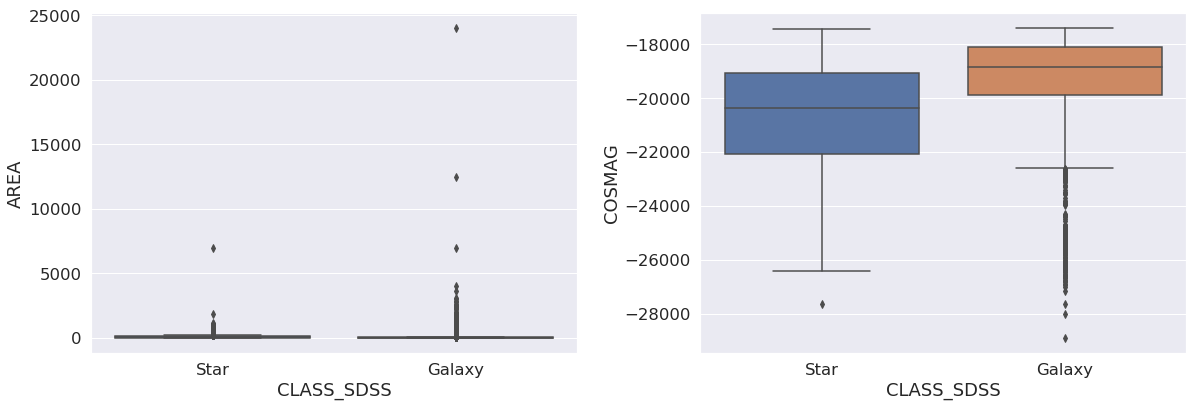

In [52]:
# pd.DataFrame({"val": [1,2], "class": ["Galaxy", "Star"]})

sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 2, figsize=(17,6))
temp = uki823_rel_df
temp.CLASS_SDSS = temp.CLASS_SDSS.replace(to_replace=[3,6], value=["Galaxy", "Star"])
sns.boxplot(x="CLASS_SDSS", y="AREA", data=pd.melt(temp.loc[:,["CLASS_SDSS","AREA"]], id_vars="CLASS_SDSS", value_name="AREA"), ax=ax[0])
sns.boxplot(x="CLASS_SDSS", y="COSMAG", data=pd.melt(temp.loc[:,["CLASS_SDSS","COSMAG"]], id_vars="CLASS_SDSS", value_name="COSMAG"), ax=ax[1])

fig.tight_layout()
fig.savefig(img_dir_db + 'area-cosmag-boxplots.pdf', format='pdf', dpi=1200)
sns.set()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
useful = uki823_rel_df.drop(non_useful_cols, axis=1).astype("float64")
# list(useful.columns)
useful[useful.columns] = scaler.fit_transform(useful[useful.columns])
useful.cov()

In [ ]:
{1: "Galaxy", 2: "Star"}[2]